In [12]:
from Regression import Regression
from Franke import FrankeCentered, FrankeCenteredNoise

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import Lasso
import scipy.stats
import time
import skimage.measure
from imageio import imread
from tqdm import tqdm, trange

mpl.style.use("seaborn-darkgrid")
mpl.rcParams["image.cmap"] = "gnuplot2"
mpl.rcParams['figure.figsize'] = [6.0, 6.0]
mpl.rcParams["xtick.labelsize"] = 18
mpl.rcParams["ytick.labelsize"] = 18
mpl.rcParams['font.size'] = 18
mpl.rcParams['lines.linewidth'] = 3.0

np.random.seed(1942)

# 1. Condition Number of Hessian Matrix
## 1.1 Standard interval, [-1, 1]

In [2]:
x, y = np.linspace(-1, 1, 101), np.linspace(-1, 1, 101)
reg = Regression()
reg.generate_generic_data(x, y, FrankeCenteredNoise)

In [3]:
poly_orders = np.arange(1, 61)
conds = np.zeros(len(poly_orders))
conds2 = np.zeros(len(poly_orders))
conds3 = np.zeros(len(poly_orders))
conds4 = np.zeros(len(poly_orders))
for i in trange(len(conds)):
    poly_order = i+1
    X = reg.get_X(reg.x_flat, reg.y_flat, poly_order)
    conds[i] = np.linalg.cond(X)
    conds2[i] = np.linalg.cond(X.T@X)
    conds3[i] = np.linalg.cond(X.T@X + np.eye((X.T@X).shape[0])*1e-2)
    conds4[i] = np.linalg.cond(X.T@X + np.eye((X.T@X).shape[0])*1e-6)

100%|██████████| 60/60 [01:55<00:00,  8.25s/it]


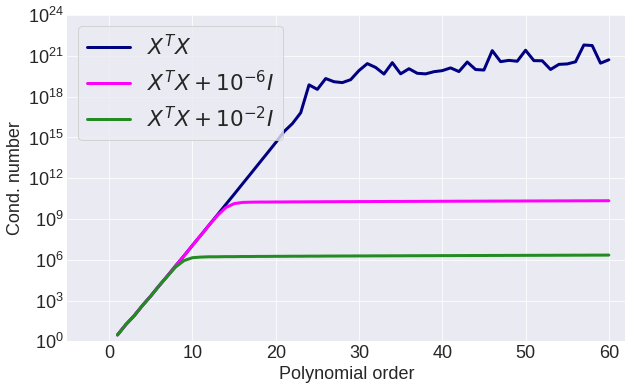

In [15]:
plt.figure(figsize=(10, 6))
#plt.semilogy(poly_orders, conds, color="navy", label=r"$X$", lw=3)
plt.semilogy(poly_orders, conds2, color="navy", label=r"$X^TX$", lw=3)
plt.semilogy(poly_orders, conds4, color="magenta", label=r"$X^TX + 10^{-6} I$", lw=3)
plt.semilogy(poly_orders, conds3, color="forestgreen", label=r"$X^TX + 10^{-2} I$", lw=3)
plt.xlabel("Polynomial order");
plt.ylabel("Cond. number");
plt.savefig("../figs/cond.pdf", bbox_inches="tight")
plt.ylim(1, 1e24)
plt.xlim(-5, 62)
plt.legend(loc=2, frameon=True);
plt.savefig("../figs/cond.pdf", bbox_inches="tight")

## 1.2 Interval [0, 2]

In [5]:
terrain0 = imread("../input_data/SRTM_data_Norway_1.tif")/1000
terrain1 = skimage.measure.block_reduce(terrain0, (8, 8), np.mean)
reg = Regression()
x = np.linspace(0, 2, terrain1.shape[0])
y = np.linspace(0, 2, terrain1.shape[1])
reg.load_matrix_data(terrain1, x=x, y=y); terrain1.shape

(451, 226)

In [6]:
poly_orders = np.arange(1, 61)
_conds = np.zeros(len(poly_orders))
_conds2 = np.zeros(len(poly_orders))
_conds3 = np.zeros(len(poly_orders))
_conds4 = np.zeros(len(poly_orders))
for i in trange(len(conds)):
    poly_order = i+1
    X = reg.get_X(reg.x_flat, reg.y_flat, poly_order)
    _conds[i] = np.linalg.cond(X)
    _conds2[i] = np.linalg.cond(X.T@X)
    _conds3[i] = np.linalg.cond(X.T@X + np.eye((X.T@X).shape[0])*1e-2)
    _conds4[i] = np.linalg.cond(X.T@X + np.eye((X.T@X).shape[0])*1e-6)

100%|██████████| 60/60 [12:32<00:00, 44.63s/it]


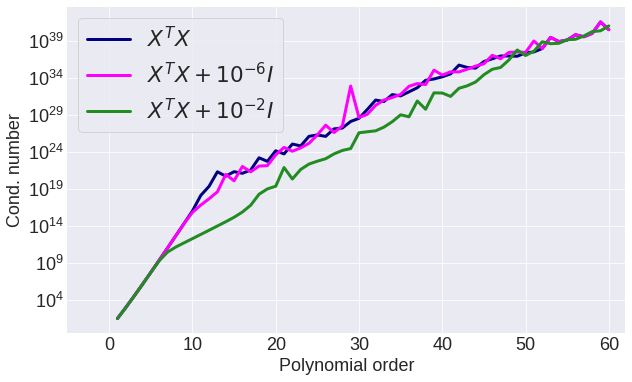

In [10]:
plt.figure(figsize=(10, 6))
#plt.semilogy(poly_orders, conds, color="navy", label=r"$X$", lw=3)
plt.semilogy(poly_orders, _conds2, color="navy", label=r"$X^TX$", lw=3)
plt.semilogy(poly_orders, _conds4, color="magenta", label=r"$X^TX + 10^{-6} I$", lw=3)
plt.semilogy(poly_orders, _conds3, color="forestgreen", label=r"$X^TX + 10^{-2} I$", lw=3)
plt.xlabel("Polynomial order");
plt.ylabel("Cond. number");
plt.savefig("../figs/cond.pdf", bbox_inches="tight")
#plt.ylim(1, 1e24)
plt.xlim(-5, 62)
plt.legend(loc=2, frameon=True);
plt.savefig("../figs/cond_02.pdf", bbox_inches="tight")